# Alien Galaxy Project

This is a clustering problem (unsupervised learning), because we are trying to find hidden patterns or natural groupings in the data without having a target variable. Therefore, first we have to preprocess data (drop irrelevant columns, check for missing values and handle categorical features), after preprocessing data.

In [38]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from pyampute.exploration.mcar_statistical_tests import MCARTest
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [39]:
#Import dataset
dat = pd.read_csv("/Users/javkhlantsogsaruul/Documents/AI and machine/Datasets-20250322/alien_galaxy.csv")
print(f'dimensions of alien galaxy data is {dat.shape}')
print(dat.dtypes)
dat.head()

dimensions of alien galaxy data is (2240, 34)
Peace_Treaty_Accords                   float64
Technological_Advancements             float64
Ammonia_Concentration                  float64
Precious_Metal_Trade_Tons              float64
Food_Production_Tons                   float64
Trade_Agreements_Signed                float64
Last_Contact_Days                      float64
Discovery_Date                          object
Mineral_Extraction_Tons                float64
Galactic_Visits                        float64
Sulfur_Concentration                   float64
Exploration_Missions                   float64
Biological_Research_Units              float64
Offspring_Colonies                     float64
Cultural_Exchange_Programs             float64
Military_Engagements                   float64
Inhabitants_Disputes                   float64
Resource_Mining_Operations             float64
Resource_Allocation_Credits            float64
Young_Colonies                         float64
HeavyMetals_Co

,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,Sulfur_Concentration,Exploration_Missions,Biological_Research_Units,Offspring_Colonies,Cultural_Exchange_Programs,Military_Engagements,Inhabitants_Disputes,Resource_Mining_Operations,Resource_Allocation_Credits,Young_Colonies,HeavyMetals_Concentration,Terraforming_Initiatives,Planet_ID,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,CO2_Concentration,Dominant_Species_Social_Structure,Hydrogen_Concentration,Colonization_Year,Species_Expansion_Response,Galactic_Trade_Revenue,Alien_Civilization_Level,Interstellar_Contact_Cost,Interplanetary_Communications
0,0.0,0.0,1.0,40.0,107.0,1.0,13.0,26-02-2030,391.0,3.0,0.0,4.0,175.0,0.0,0.0,0.0,0.0,NaN,67.0,0.0,4.0,0.0,6406.0,647.0,78285.0,10.0,Married,98.55,3118.0,NaN,11.0,Master,3.0,6.0
1,0.0,0.0,2.0,108.0,49.0,1.0,NaN,29-11-2028,NaN,2.0,3.0,6.0,43.0,0.0,NaN,NaN,0.0,11.0,8.0,1.0,3.0,0.0,6461.0,581.0,62772.0,10.0,Single,66.36,3099.0,0.0,11.0,Master,3.0,5.0
2,NaN,0.0,1.0,161.0,53.0,NaN,61.0,22-03-2029,363.0,5.0,NaN,9.0,123.0,0.0,NaN,0.0,0.0,13.0,107.0,1.0,2.0,0.0,NaN,726.0,69016.0,5.0,Married,25.23,3100.0,0.0,11.0,Graduation,3.0,8.0
3,0.0,0.0,1.0,107.0,NaN,3.0,NaN,15-01-2030,53.0,7.0,2.0,3.0,4.0,0.0,0.0,1.0,NaN,4.0,3.0,1.0,3.0,0.0,6720.0,314.0,43795.0,NaN,Together,44.59,3098.0,1.0,11.0,Master,3.0,7.0
4,0.0,0.0,0.0,29.0,59.0,7.0,24.0,06-08-2029,177.0,3.0,2.0,6.0,77.0,0.0,0.0,0.0,1.0,8.0,5.0,1.0,3.0,0.0,9483.0,290.0,57957.0,8.0,Together,90.67,3089.0,0.0,11.0,Graduation,3.0,4.0


The output shows that dataset contains 2,240 observations (rows), each representing a planet colonized by alien species. It includes 34 features (columns) that describe various characteristics of each planet, ranging from environmental factors (Ammonia_Concentration, Sulfur_Concentration...) to sociopolitical and economic metrics (Peace_Treaty_Accords, Galactic_Trade_Revenue, Military_Engagements...).

#### Data Preprocessing and Explanatory data analysis

From data head, few variables are observed as unnecessary, so we are dropping these variables. 'Planet_ID' is just an identifier and 'Discovery_Date' is a timestamp which is not meaningful for clustering, so we drop both.

In [40]:
#Dropping unnecessary variables
dat = dat.drop(['Planet_ID', 'Discovery_Date'], axis=1)

In [41]:
#Extracting object type variables to check levels and frequencies
obj_dat = dat.select_dtypes('object')
print(f'Number of object types features are {obj_dat.shape[1]}.')
obj_dat.head()

Number of object types features are 2.


,Dominant_Species_Social_Structure,Alien_Civilization_Level
0,Married,Master
1,Single,Master
2,Married,Graduation
3,Together,Master
4,Together,Graduation


As we can see from the output, there are 2 object type (categorical) features in the data. 

In [42]:
#Checking frequency for two object-type variables
print(dat.describe(include="object"))
print(f'Frequency of each level of Dominant species social structure is \n {dat[obj_dat.columns[0]].value_counts()}')
print(f'Frequency of each level of Alien civilization level is \n {dat[obj_dat.columns[1]].value_counts()}')

       Dominant_Species_Social_Structure Alien_Civilization_Level
count                               2007                     2018
unique                                 8                        5
top                              Married               Graduation
freq                                 771                     1014
Frequency of each level of Dominant species social structure is 
 Dominant_Species_Social_Structure
Married     771
Together    523
Single      427
Divorced    208
Widow        72
Alone         3
YOLO          2
Absurd        1
Name: count, dtype: int64
Frequency of each level of Alien civilization level is 
 Alien_Civilization_Level
Graduation    1014
PhD            431
Master         340
2n Cycle       186
Basic           47
Name: count, dtype: int64


In Dominant species social structure, there are two rare categories ('Absurd', 'YOLO'), so it will be dropped. Also, there are some same meaning words, which will be merged. ('Married', 'Together') will be merged as 'Married' and ('Single', 'Alone') will be merged 'Single'. For Alien civilization level, "2n Cycle" will be merged with "Master". 

In [43]:
#Merge small categories in Alien_Civilization_Level
dat['Alien_Civilization_Level'] = dat['Alien_Civilization_Level'].replace({
    '2n Cycle': 'Master'})

#Drop rare categories in Dominant_Species_Social_Structure
drop_idx = dat[dat['Dominant_Species_Social_Structure'].isin(['Absurd', 'YOLO'])].index
dat.drop(index=drop_idx, inplace=True)

# Merge similar categories in Dominant_Species_Social_Structure
dat['Dominant_Species_Social_Structure'] = dat['Dominant_Species_Social_Structure'].replace({
    'Together': 'Married',
    'Alone': 'Single'
})

#Check new data and distribution
print(f"Data after cleaning: {dat.shape}")
print(dat['Dominant_Species_Social_Structure'].value_counts())
print(dat['Alien_Civilization_Level'].value_counts())

Data after cleaning: (2237, 32)
Dominant_Species_Social_Structure
Married     1294
Single       430
Divorced     208
Widow         72
Name: count, dtype: int64
Alien_Civilization_Level
Graduation    1013
Master         526
PhD            429
Basic           47
Name: count, dtype: int64


These two variables giving information about aliens, so we visualize their distribution.

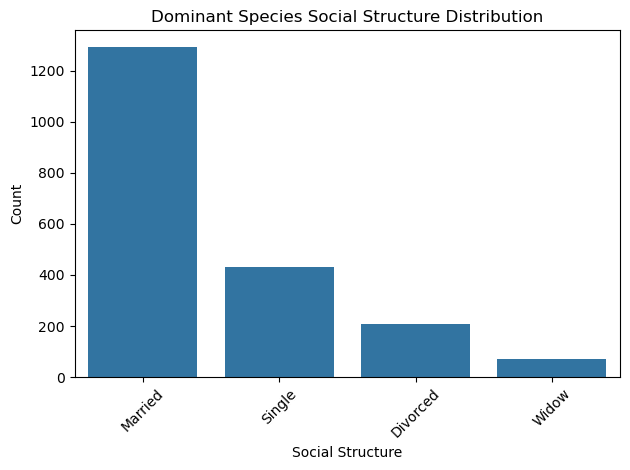

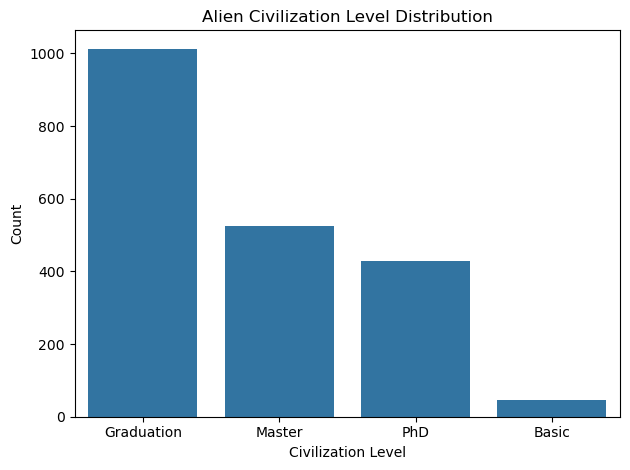

In [44]:
#Distribution of Dominant Species Social Structure
sns.countplot(data=dat, x='Dominant_Species_Social_Structure', order=dat['Dominant_Species_Social_Structure'].value_counts().index)
plt.title("Dominant Species Social Structure Distribution")
plt.xlabel("Social Structure")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of Alien Civilization Level
sns.countplot(data=dat, x='Alien_Civilization_Level', order=dat['Alien_Civilization_Level'].value_counts().index)
plt.title("Alien Civilization Level Distribution")
plt.xlabel("Civilization Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Convert categorical variables into numerical format for clustering:

We use one-hot encoding for 'Dominant_Species_Social_Structure' because it is nominal (no hierarchy).  We apply ordinal encoding to 'Alien_Civilization_Level' to keep its hierarchical structure of education (Basic < Graduation < Master < PhD).
(Clustering algorithms like KMeans work only with numerical input and rely on distance metrics)


In [45]:
#Check null values first
dat.select_dtypes('object').isnull().sum()

Dominant_Species_Social_Structure    233
Alien_Civilization_Level             222
dtype: int64

In categorical values, just 222 and 233 are missing out of 2237 total rows. It's approximately 10%, so it's safe to drop it.

In [46]:
#Drop missing values
dat = dat.dropna(subset=['Dominant_Species_Social_Structure', 'Alien_Civilization_Level'])

In [47]:
# Encode categorical features

# One-hot encode the nominal feature (drop_first=True- avoids multicollinearity, dependence on each other)
dat = pd.get_dummies(dat, columns=['Dominant_Species_Social_Structure'], drop_first=True)

# Ordinal encoding for Alien_Civilization_Level
ordinal_map = [['Basic', 'Graduation', 'Master', 'PhD']]  # Ordered from lowest to highest
oe = OrdinalEncoder(categories=ordinal_map)
dat[['Alien_Civilization_Level']] = oe.fit_transform(dat[['Alien_Civilization_Level']])


Let's see summary statistics to check low-variance features

In [48]:
# Summary statistics of all numerical features
summary_stats = dat.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
Peace_Treaty_Accords,1628.0,0.068182,0.252135,0.00,0.00,0.0,0.00,1.00
Technological_Advancements,1642.0,0.068819,0.253222,0.00,0.00,0.0,0.00,1.00
Ammonia_Concentration,1643.0,1.470481,1.018501,0.00,1.00,1.0,2.00,5.00
Precious_Metal_Trade_Tons,1629.0,43.785758,51.968192,0.00,9.00,24.0,56.00,321.00
Food_Production_Tons,1609.0,25.870106,39.231183,0.00,1.00,8.0,32.00,199.00
Trade_Agreements_Signed,1640.0,2.299390,1.864540,0.00,1.00,2.0,3.00,15.00
Last_Contact_Days,1625.0,48.796308,29.359643,0.00,23.00,49.0,74.00,99.00
Mineral_Extraction_Tons,1645.0,163.710638,223.434802,0.00,16.00,66.0,224.00,1725.00
Galactic_Visits,1631.0,5.302882,2.441007,0.00,3.00,6.0,7.00,20.00
Sulfur_Concentration,1644.0,1.988443,1.434464,0.00,1.00,2.0,3.00,7.00


The 'count' column shows non-missing values per feature, so low number of count means high missing values. Many features have 0 as min, 25%, 50%, and 75% values, showing right-skewness and sparsity.

In [49]:
# Subset numeric features for further analysis
num_dat = dat.select_dtypes(include=['float64', 'int64'])
print(f"Number of numeric features: {num_dat.shape[1]}")
pd.set_option('display.max_columns', None) 
num_dat.head()

Number of numeric features: 31


,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Mineral_Extraction_Tons,Galactic_Visits,Sulfur_Concentration,Exploration_Missions,Biological_Research_Units,Offspring_Colonies,Cultural_Exchange_Programs,Military_Engagements,Inhabitants_Disputes,Resource_Mining_Operations,Resource_Allocation_Credits,Young_Colonies,HeavyMetals_Concentration,Terraforming_Initiatives,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,CO2_Concentration,Hydrogen_Concentration,Colonization_Year,Species_Expansion_Response,Galactic_Trade_Revenue,Alien_Civilization_Level,Interstellar_Contact_Cost,Interplanetary_Communications
0,0.0,0.0,1.0,40.0,107.0,1.0,13.0,391.0,3.0,0.0,4.0,175.0,0.0,0.0,0.0,0.0,NaN,67.0,0.0,4.0,0.0,647.0,78285.0,10.0,98.55,3118.0,NaN,11.0,2.0,3.0,6.0
1,0.0,0.0,2.0,108.0,49.0,1.0,NaN,NaN,2.0,3.0,6.0,43.0,0.0,NaN,NaN,0.0,11.0,8.0,1.0,3.0,0.0,581.0,62772.0,10.0,66.36,3099.0,0.0,11.0,2.0,3.0,5.0
2,NaN,0.0,1.0,161.0,53.0,NaN,61.0,363.0,5.0,NaN,9.0,123.0,0.0,NaN,0.0,0.0,13.0,107.0,1.0,2.0,0.0,726.0,69016.0,5.0,25.23,3100.0,0.0,11.0,1.0,3.0,8.0
3,0.0,0.0,1.0,107.0,NaN,3.0,NaN,53.0,7.0,2.0,3.0,4.0,0.0,0.0,1.0,NaN,4.0,3.0,1.0,3.0,0.0,314.0,43795.0,NaN,44.59,3098.0,1.0,11.0,2.0,3.0,7.0
4,0.0,0.0,0.0,29.0,59.0,7.0,24.0,177.0,3.0,2.0,6.0,77.0,0.0,0.0,0.0,1.0,8.0,5.0,1.0,3.0,0.0,290.0,57957.0,8.0,90.67,3089.0,0.0,11.0,1.0,3.0,4.0


From the summary statistics and numeric features, 8 features seems like low-variance and constant, so let's check those:

In [50]:
# Check value counts for suspected low-variance or constant features
low_var_features = ['Peace_Treaty_Accords', 'Technological_Advancements',
                    'Cultural_Exchange_Programs', 'Military_Engagements',
                    'Inhabitants_Disputes', 'Terraforming_Initiatives',
                    'Galactic_Trade_Revenue', 'Interstellar_Contact_Cost']

for col in low_var_features:
    print(f"\n{col} value counts:\n{num_dat[col].value_counts()}")



Peace_Treaty_Accords value counts:
Peace_Treaty_Accords
0.0    1517
1.0     111
Name: count, dtype: int64

Technological_Advancements value counts:
Technological_Advancements
0.0    1529
1.0     113
Name: count, dtype: int64

Cultural_Exchange_Programs value counts:
Cultural_Exchange_Programs
0.0    1602
1.0      22
Name: count, dtype: int64

Military_Engagements value counts:
Military_Engagements
0.0    1514
1.0     112
Name: count, dtype: int64

Inhabitants_Disputes value counts:
Inhabitants_Disputes
0.0    1609
1.0      14
Name: count, dtype: int64

Terraforming_Initiatives value counts:
Terraforming_Initiatives
0.0    1504
1.0     124
Name: count, dtype: int64

Galactic_Trade_Revenue value counts:
Galactic_Trade_Revenue
11.0    1592
Name: count, dtype: int64

Interstellar_Contact_Cost value counts:
Interstellar_Contact_Cost
3.0    1627
Name: count, dtype: int64


We drop that features with very low variance or constant values. These include variables whose almost all values are zero, or all are the same. 

In detail, Majority of planets has no peace treaty accords, technological advancements, cultural exchange programs, military engegements, inhabitants dispute, and terraforming initiatives. 
Also, Galactic_Trade_Revenue, Interstellar_Contact_Cost are constant for all planets.
Such features do not help clustering since they don’t contribute meaningful separation between observations. 

In [51]:
num_dat = num_dat.drop(columns=low_var_features)

#### Missing Values

In [52]:
# Number and percentage of missing values in the dataset (with dropped low variance features 'dat')
missing_info = {
    col: [dat[col].isnull().sum(), f"{np.round(dat[col].isnull().mean() * 100, 2)}%"]
    for col in dat.columns if dat[col].isnull().any()
}
missing_info

{'Peace_Treaty_Accords': [182, '10.06%'],
 'Technological_Advancements': [168, '9.28%'],
 'Ammonia_Concentration': [167, '9.23%'],
 'Precious_Metal_Trade_Tons': [181, '10.0%'],
 'Food_Production_Tons': [201, '11.1%'],
 'Trade_Agreements_Signed': [170, '9.39%'],
 'Last_Contact_Days': [185, '10.22%'],
 'Mineral_Extraction_Tons': [165, '9.12%'],
 'Galactic_Visits': [179, '9.89%'],
 'Sulfur_Concentration': [166, '9.17%'],
 'Exploration_Missions': [180, '9.94%'],
 'Biological_Research_Units': [170, '9.39%'],
 'Offspring_Colonies': [184, '10.17%'],
 'Cultural_Exchange_Programs': [186, '10.28%'],
 'Military_Engagements': [184, '10.17%'],
 'Inhabitants_Disputes': [187, '10.33%'],
 'Resource_Mining_Operations': [189, '10.44%'],
 'Resource_Allocation_Credits': [156, '8.62%'],
 'Young_Colonies': [183, '10.11%'],
 'HeavyMetals_Concentration': [171, '9.45%'],
 'Terraforming_Initiatives': [182, '10.06%'],
 'Liquid_Energy_Consumption_Terawatts': [202, '11.16%'],
 'Alien_Population_Count': [194, '10.7

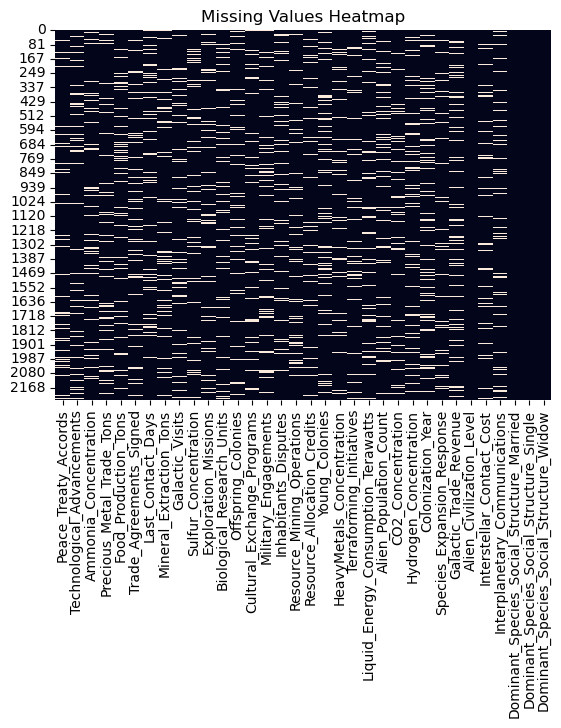

In [53]:
# Heatmap of missing values (with dropped low variance features to see the missing values overall)
sns.heatmap(dat.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [54]:
# Check if missingness is completely at random (MCAR)
from pyampute.exploration.mcar_statistical_tests import MCARTest
mcar_test = MCARTest(method="little")
print(mcar_test.little_mcar_test(num_dat))
# If p-value < 0.05: missing data is NOT MCAR (not completely at random)
# If p-value > 0.05: missing data is MCAR (completely at random)


0.8642096433751107



The missing value heatmap shows that missingness is spread across many features,but without any obvious patterns.

The Little's MCAR test returned a p-value of 0.864, which is greater than 0.05. This means missing data is Missing Completely At Random (MCAR). Therefore, we can use statistical imputation techniques (KNN) without introducing bias.

In [55]:
# Apply KNN imputation to fill missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dat_imputed = imputer.fit_transform(num_dat)
print(pd.DataFrame(dat_imputed, columns=num_dat.columns).head())


   Ammonia_Concentration  Precious_Metal_Trade_Tons  Food_Production_Tons  \
0                    1.0                       40.0                 107.0   
1                    2.0                      108.0                  49.0   
2                    1.0                      161.0                  53.0   
3                    1.0                      107.0                   8.2   
4                    0.0                       29.0                  59.0   

   Trade_Agreements_Signed  Last_Contact_Days  Mineral_Extraction_Tons  \
0                      1.0               13.0                    391.0   
1                      1.0               45.4                    459.4   
2                      2.0               61.0                    363.0   
3                      3.0               46.0                     53.0   
4                      7.0               24.0                    177.0   

   Galactic_Visits  Sulfur_Concentration  Exploration_Missions  \
0              3.0        

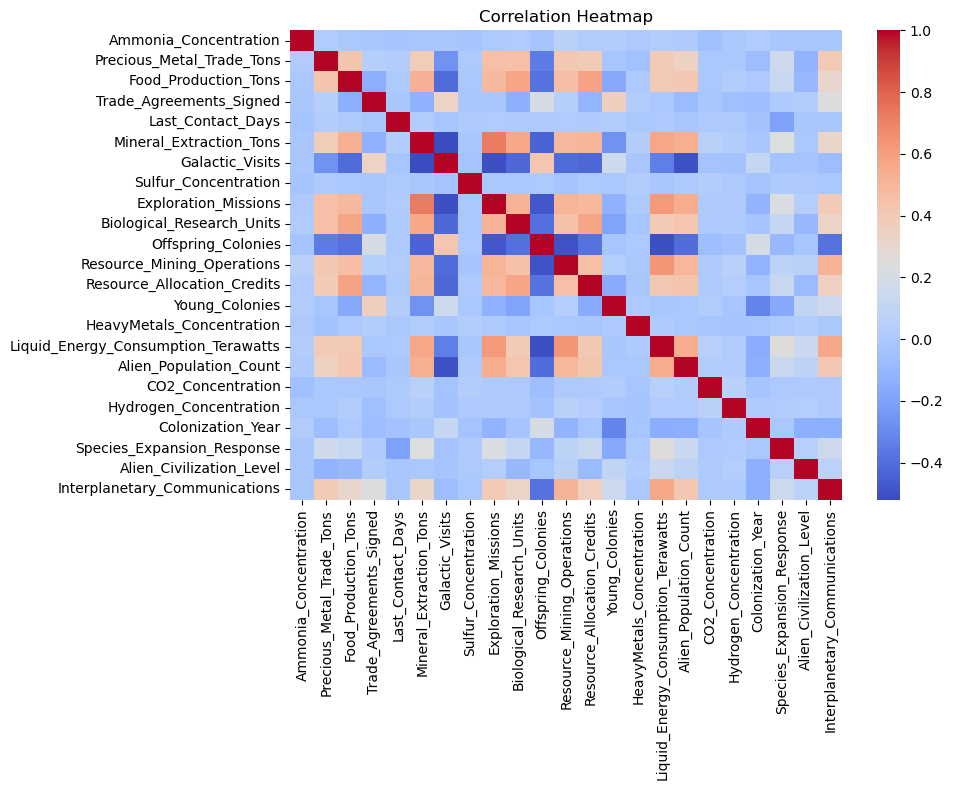

In [56]:
# Plot correlation heatmap after imputation
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(dat_imputed, columns=num_dat.columns).corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

The correlation heatmap shows that most features are weakly to moderately correlated. Some meaningful relationships appear, such as: 

Mineral_Extraction_Tons and Resource_Allocation_Credits show a moderate positive correlation, indicating that planets rich in minerals tend to receive more resource credits.

Food_Production_Tons is mildly correlated with Alien_Population_Count, suggesting a relationship between food output and planet population.

Overall, there is no strong multicollinearity, so the data is suitable for clustering.

#### Feature scaling and Dimensionality reduction:

##### Feature scaling (StandardScaler)

We use StandardScaler to normalize the data so that all features have the same scale, which is important for clustering algorithms like KMeans and PCA that rely on distance calculations.

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the imputed data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dat_imputed)
scaled_df = pd.DataFrame(scaled_data, columns=num_dat.columns)
scaled_df.head()


,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Mineral_Extraction_Tons,Galactic_Visits,Sulfur_Concentration,Exploration_Missions,Biological_Research_Units,Offspring_Colonies,Resource_Mining_Operations,Resource_Allocation_Credits,Young_Colonies,HeavyMetals_Concentration,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,CO2_Concentration,Hydrogen_Concentration,Colonization_Year,Species_Expansion_Response,Alien_Civilization_Level,Interplanetary_Communications
0,-0.449071,-0.055884,2.168273,-0.723520,-1.245933,1.028896,-0.986402,-1.448703,0.492060,2.597861,-0.871201,0.755009,1.035449,-0.967959,1.001654,1.053101,1.044309,1.660532,1.190855,1.704153,-0.420110,0.406049,0.768803
1,0.569244,1.303289,0.632046,-0.723520,-0.094765,1.339709,-1.408479,0.727237,1.186833,0.120099,-0.871201,1.719552,-0.453083,0.967104,0.007906,0.852644,0.433191,1.660532,0.213071,0.033081,-0.420110,0.406049,0.385988
2,-0.449071,2.362644,0.737992,-0.166018,0.459502,0.901662,-0.142247,0.727237,2.228993,1.621773,-0.871201,2.362582,2.044623,0.967104,-0.985842,1.293042,0.679167,-0.126579,-1.036269,0.121032,-0.420110,-0.794847,1.534433
3,-0.449071,1.283301,-0.448611,0.391483,-0.073447,-0.506994,0.701908,0.001923,0.144674,-0.611967,-0.871201,-0.531050,-0.579230,0.967104,0.007906,0.041704,-0.314387,-0.484001,-0.448201,-0.054870,2.550196,0.406049,1.151618
4,-1.467386,-0.275750,0.896912,2.621489,-0.855105,0.056469,-0.986402,0.001923,1.186833,0.758310,-0.871201,0.755009,-0.528771,0.967104,0.007906,-0.031189,0.243510,0.945688,0.951497,-0.846430,-0.420110,-0.794847,0.003173


##### PCA (dimensional reduction)

We first visualize the projected data structure using the two principal components, then use a PCA biplot with Civilization level (to see pattern of alien types) to understand which features most influence those directions.

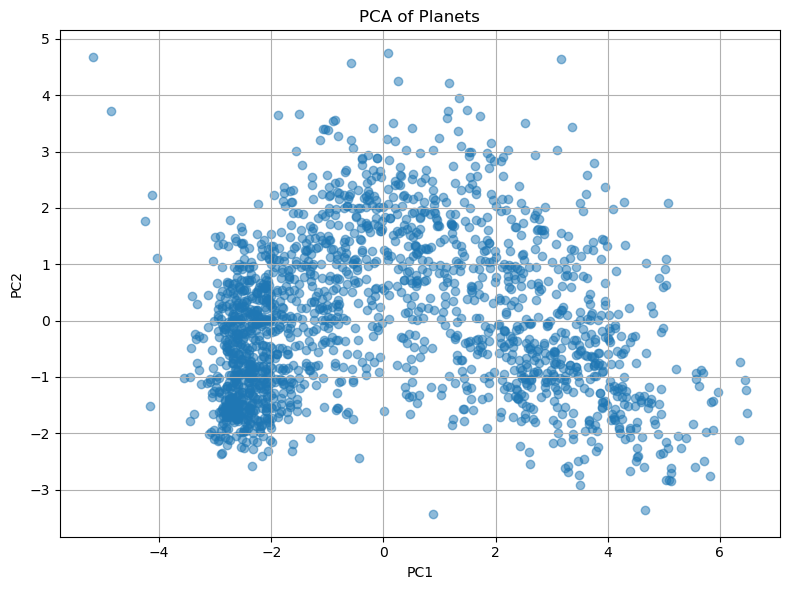

In [58]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

# Simple scatter plot of PCA output
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title("PCA of Planets")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


The PCA projection reduces the high-dimensional feature space into two principal components, allowing us to visualize the overall structure of the data. Each point represents a colonized planet. We think that the points aren’t random, there’s structure and curved spread, especially that dense left cluster and dispersed spread on the right indicates underlying patterns, so we see that preprocessing is working as intended.

Add Civilization Level + PCA biplot with arrows

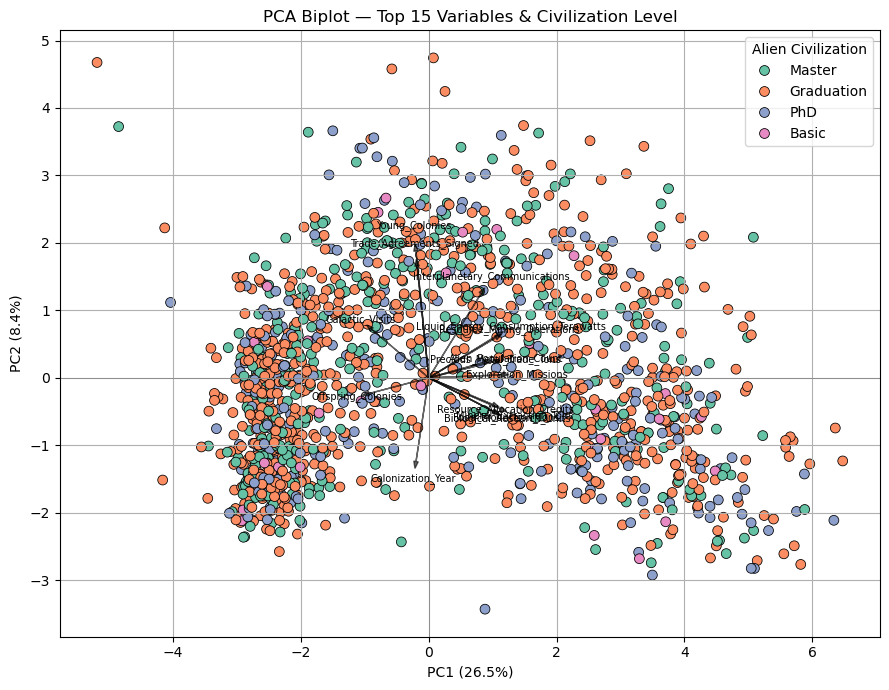

In [59]:
# Create DataFrame of PCA scores
pca_scores = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Map Civilization Level
pca_scores['Civilization_Level'] = dat['Alien_Civilization_Level'].map({
    0: 'Basic', 1: 'Graduation', 2: 'Master', 3: 'PhD'
})

# Create loadings DataFrame
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PC1', 'PC2'],
                        index=scaled_df.columns)

# Compute magnitude and filter top 15 variables
loadings['magnitude'] = np.sqrt(loadings['PC1']**2 + loadings['PC2']**2)
top_loadings = loadings.sort_values('magnitude', ascending=False).head(15)

# Biplot
plt.figure(figsize=(9, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Civilization_Level', data=pca_scores,
                palette='Set2', s=50, edgecolor='k')

# Plot top loadings as arrows
scale_arrow = 3.5
scale_text = 4.2

for i in range(top_loadings.shape[0]):
    load_x = top_loadings.PC1.iloc[i] * scale_arrow
    load_y = top_loadings.PC2.iloc[i] * scale_arrow
    plt.arrow(0, 0, load_x, load_y, color='black', alpha=0.6, head_width=0.07)
    
    text_x = top_loadings.PC1.iloc[i] * scale_text
    text_y = top_loadings.PC2.iloc[i] * scale_text
    plt.text(text_x, text_y, top_loadings.index[i], color='black',
             ha='center', va='center', fontsize=7)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title('PCA Biplot — Top 15 Variables & Civilization Level')
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.legend(title='Alien Civilization')
plt.tight_layout()
plt.show()


The PCA biplot illustrates how the original features contribute to the first two principal components. Each arrow represents a feature, and its direction and length indicate the strength and orientation of its influence. Features pointing in the same direction are positively correlated, while those pointing in opposite directions are negatively correlated. This visualization helps us understand which features are driving the underlying structure observed in the data.

### Clustering methods

#### 1. K-Means Clustering 

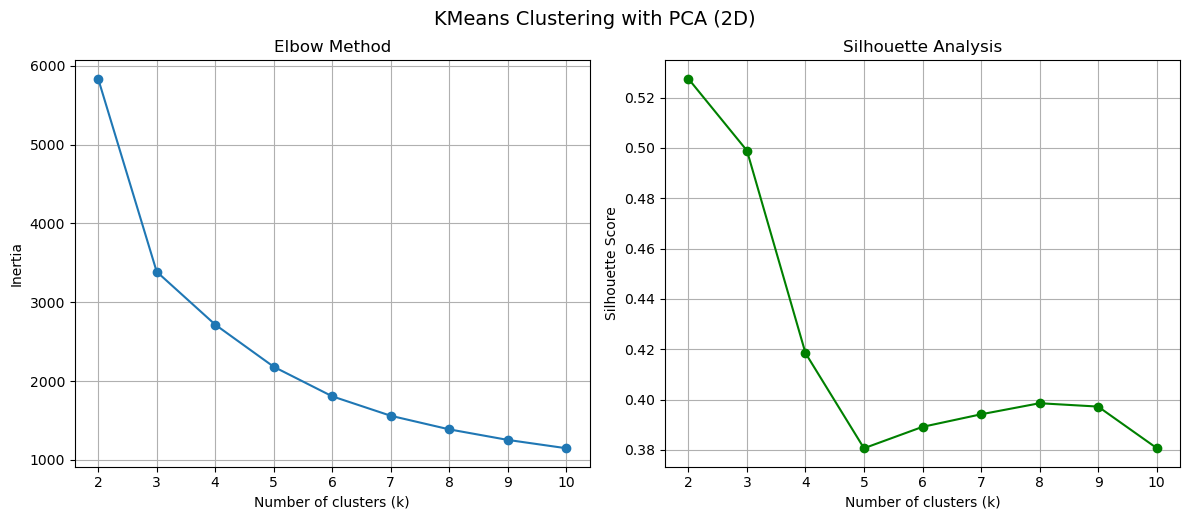

In [60]:
#Use PCA data for KMeans clustering
kmeans_dat = pca_result  

# range of k values to test
k_range = range(2, 11)
inertias = []
silhouettes = []

# Looping over different k values
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(kmeans_dat)
    inertias.append(model.inertia_)
    silhouettes.append(silhouette_score(kmeans_dat, labels))

# Plot Elbow and Silhouette Score
plt.figure(figsize=(12, 5))

# Elbow plot
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)

# Silhouette plot
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouettes, marker='o', color='green')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)

plt.tight_layout()
plt.suptitle('KMeans Clustering with PCA (2D)', fontsize=14, y=1.03)
plt.show()


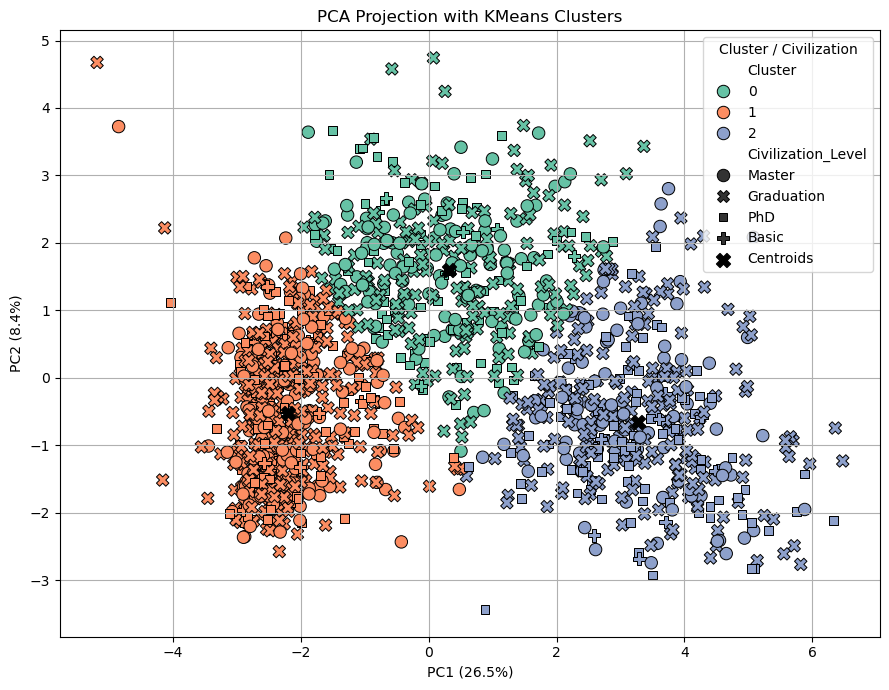

In [61]:
# Apply KMeans with best k
best_k = 3
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_labels = final_kmeans.fit_predict(pca_result)
centroids = final_kmeans.cluster_centers_

# Prepare plot DataFrame
pca_df0 = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df0['Cluster'] = kmeans_labels
pca_df0['Civilization_Level'] = dat['Alien_Civilization_Level'].map({
    0: 'Basic', 1: 'Graduation', 2: 'Master', 3: 'PhD'
})

# Project centroids for visualization
centroids_pca = centroids  # already in PCA space

# PCA Scatter plot with clusters
plt.figure(figsize=(9, 7))
sns.scatterplot(data=pca_df0, x='PC1', y='PC2', hue='Cluster', style='Civilization_Level', palette='Set2', s=80, edgecolor='k')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=100, c='black', marker='X', label='Centroids')
plt.title('PCA Projection with KMeans Clusters')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title='Cluster / Civilization')
plt.grid(True)
plt.tight_layout()
plt.show()


##### Cluster Profiling

Cluster profiling helps interpret and describe each cluster by showing how its feature values differ from others. It reveals the unique characteristics of each group.

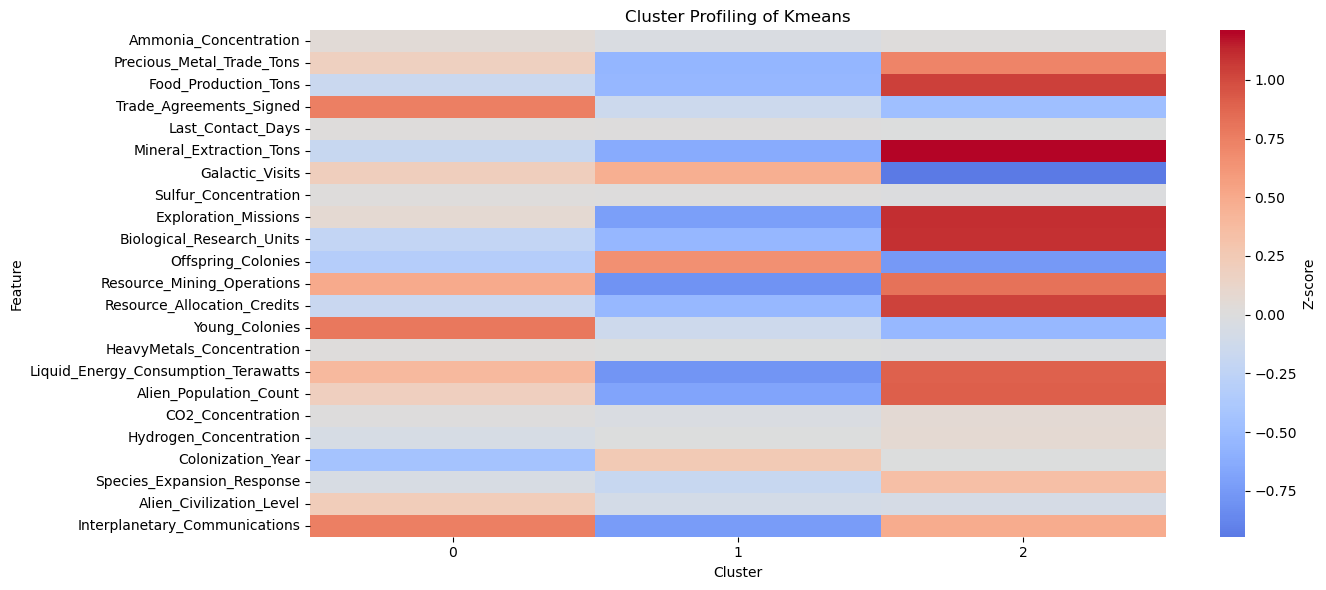

In [62]:
# Reattach cluster labels to scaled data
dat_clustered = pd.DataFrame(scaled_data, columns=num_dat.columns)
dat_clustered['Cluster'] = kmeans_labels
# Compute mean z-score per feature per cluster
cluster_means = dat_clustered.groupby('Cluster').mean()

plt.figure(figsize=(14, 6))
sns.heatmap(cluster_means.T, cmap='coolwarm', center=0, cbar_kws={'label': 'Z-score'})
plt.title("Cluster Profiling of Kmeans")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


The cluster profiling heatmap shows that each cluster has distinct feature patterns. For example, Cluster 2 stands out with high scores in features like mineral extraction, exploration missions, and biological research units, indicating a focus on expansion and resource development. Cluster 1 shows lower levels across most features, suggesting planets that are less resource-intensive or exploratory. Cluster 0 highlights moderate levels in trade agreements and offspring colonies, hinting at socially inclined or diplomatically active civilizations. These patterns reflect how planets with specific characteristics are likely to attract different types of alien species.


Civilization Level Distribution in Each Cluster

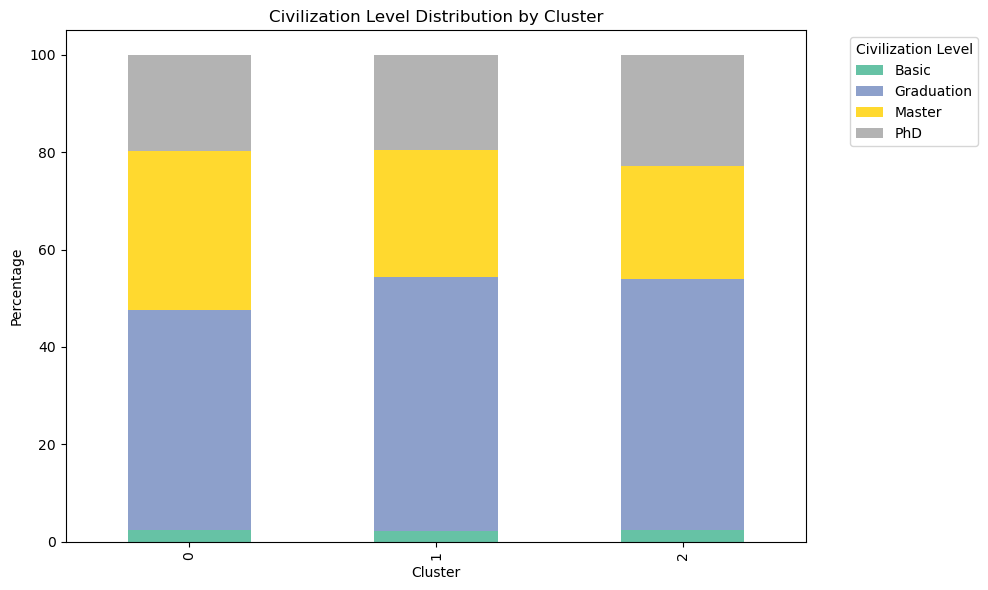

In [63]:
# Distribution of Alien Civilization Level by Cluster
civ_dist = pd.crosstab(pca_df0['Cluster'], pca_df0['Civilization_Level'], normalize='index') * 100

# Stacked bar plot
civ_dist.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10, 6))
plt.title('Civilization Level Distribution by Cluster')
plt.ylabel('Percentage')
plt.xlabel('Cluster')
plt.legend(title='Civilization Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


One of the goal of grouping together these colonized planets is to understand which types of planets attract certain alien species. So, we showed Distribution of Alien Civilization Level by Cluster. The stacked bar chart shows that all clusters are predominantly composed of Graduation and Master-level civilizations, with minor variations. Cluster 1 and Cluster 2 have slightly higher proportions of Graduation-level planets, while Cluster 0 has a more balanced mix of Master and Graduation levels. Basic civilizations are very rare across all clusters.

#### 2. Agglomerative clustering

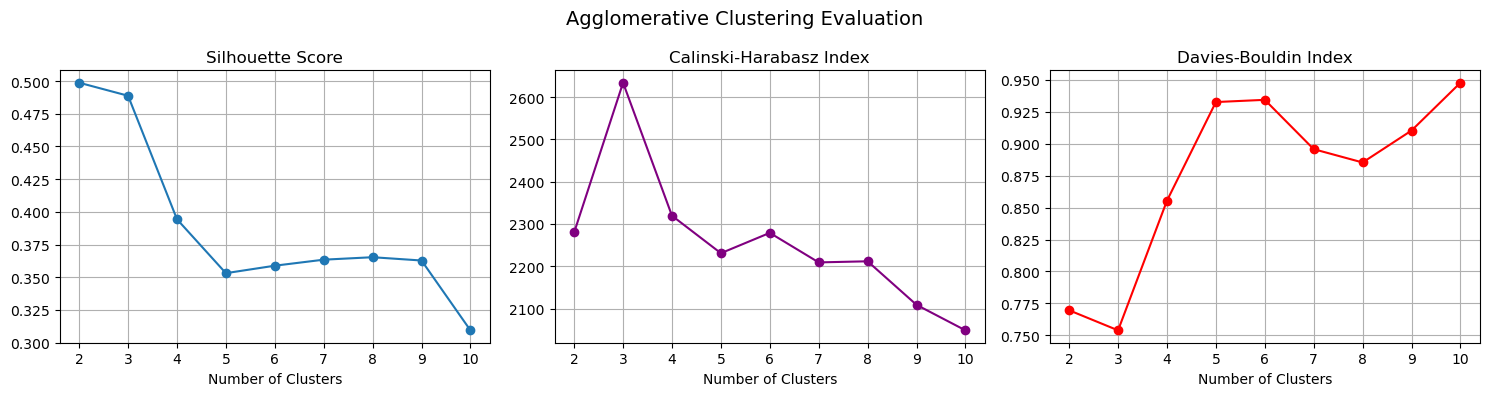

In [64]:
# Use PCA-reduced 2D data
agglo_dat = pca_result

# Try different numbers of clusters
k_range = range(2, 11)
silhouettes = []
calinskis = []
davies = []

for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(agglo_dat)
    silhouettes.append(silhouette_score(agglo_dat, labels))
    calinskis.append(calinski_harabasz_score(agglo_dat, labels))
    davies.append(davies_bouldin_score(agglo_dat, labels))

# Plot metrics
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(k_range, silhouettes, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(k_range, calinskis, marker='o', color='purple')
plt.title("Calinski-Harabasz Index")
plt.xlabel("Number of Clusters")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(k_range, davies, marker='o', color='red')
plt.title("Davies-Bouldin Index")
plt.xlabel("Number of Clusters")
plt.grid(True)

plt.suptitle("Agglomerative Clustering Evaluation", fontsize=14)
plt.tight_layout()
plt.show()


We should choose k with high Calinski-Harabasz and Silhouette Score, but low Davies-Bouldin Index, so balancing all of them, we choose k = 3.

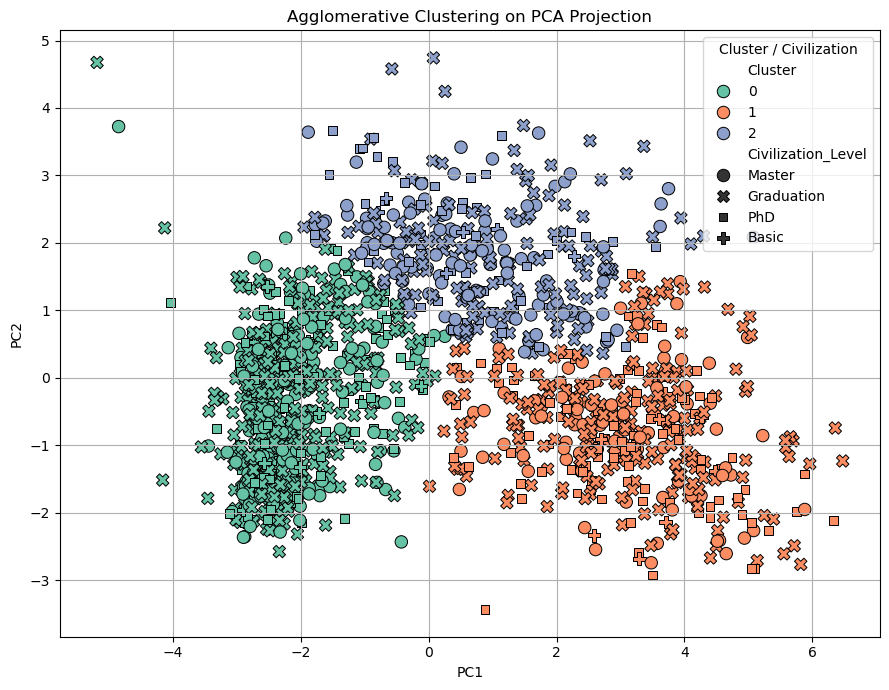

In [65]:
# Choose best k 
best_k_agglo = 3

# Fit final model
final_agglo = AgglomerativeClustering(n_clusters=best_k_agglo)
agglo_labels = final_agglo.fit_predict(pca_result)

# Prepare DataFrame
agglo_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
agglo_df['Cluster'] = agglo_labels
agglo_df['Civilization_Level'] = dat['Alien_Civilization_Level'].map({
    0: 'Basic', 1: 'Graduation', 2: 'Master', 3: 'PhD'
})

# Plot clusters
plt.figure(figsize=(9, 7))
sns.scatterplot(data=agglo_df, x='PC1', y='PC2',
                hue='Cluster', style='Civilization_Level',
                palette='Set2', s=80, edgecolor='k')
plt.title("Agglomerative Clustering on PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster / Civilization")
plt.grid(True)
plt.tight_layout()
plt.show()


##### Cluster Profiling for Agglomerative

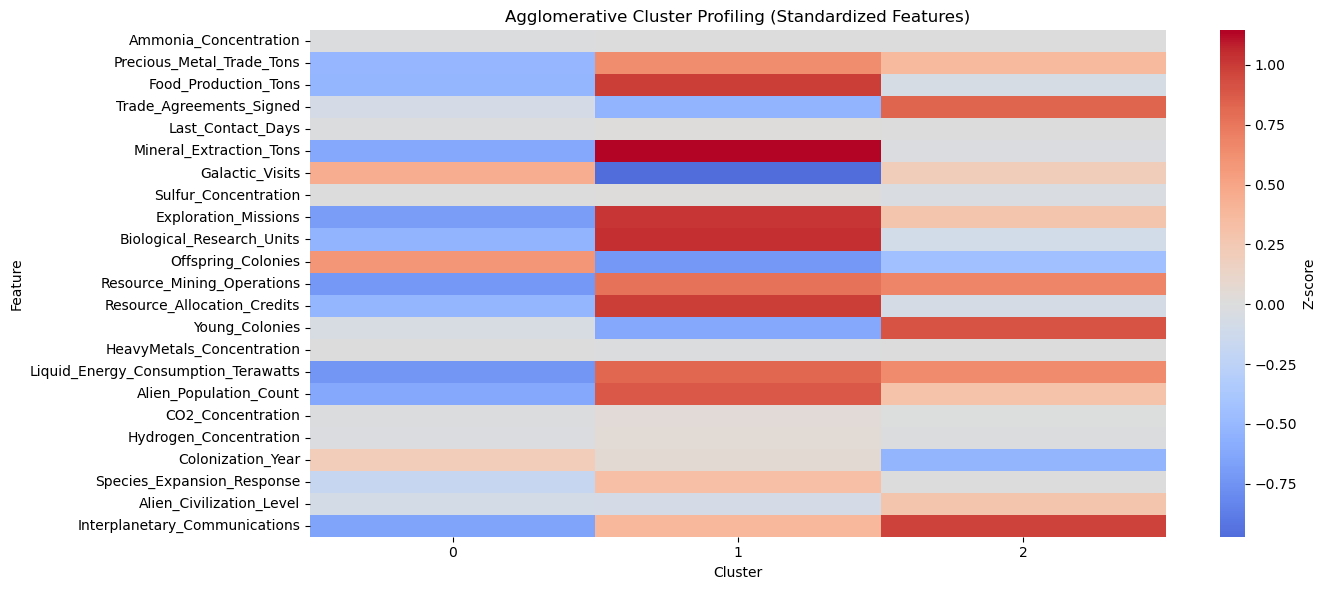

In [66]:
# Create scaled DataFrame and add cluster labels
dat_clustered_agglo = pd.DataFrame(scaled_data, columns=num_dat.columns)
dat_clustered_agglo['Cluster'] = agglo_labels

# Feature z-score means per cluster
cluster_means_agglo = dat_clustered_agglo.groupby('Cluster').mean()

plt.figure(figsize=(14, 6))
sns.heatmap(cluster_means_agglo.T, cmap='coolwarm', center=0, cbar_kws={'label': 'Z-score'})
plt.title("Agglomerative Cluster Profiling (Standardized Features)")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


The Agglomerative cluster profiling shows that Cluster 1 is characterized by high values in features like mineral extraction, exploration missions, and biological research units, reflecting an emphasis on planetary development and exploration. Cluster 2 exhibits moderate scores across many features, particularly in trade, colony expansion, and population, indicating balanced planets with social and resource-focused activities. Cluster 0 shows lower levels in most features but slightly higher offspring colonies, suggesting planets that may focus on social reproduction or local settlement. 

Civilization Level Distribution in Agglomerative Clusters

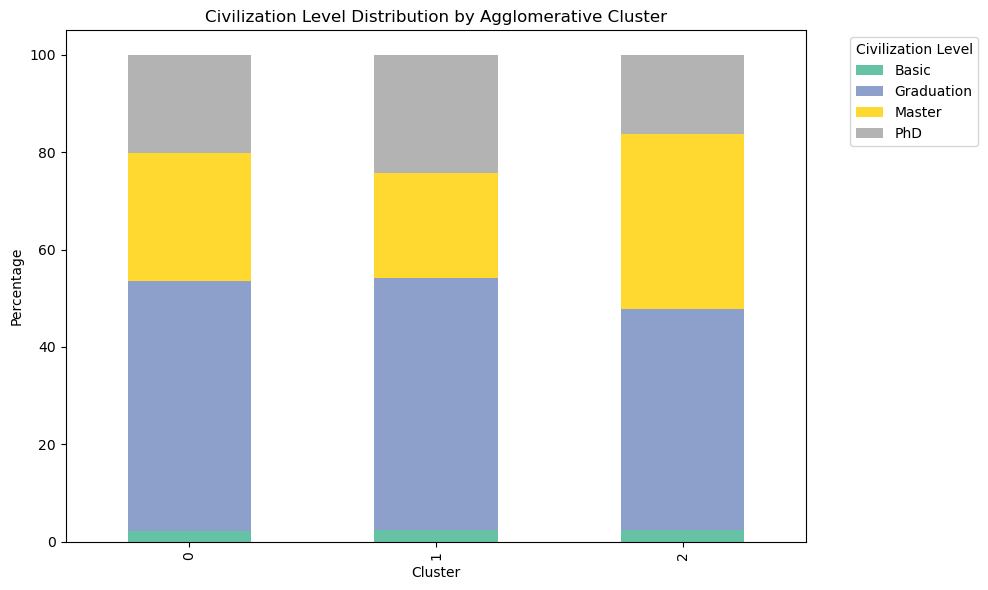

In [67]:
# Cluster-civilization distribution
civ_dist_agglo = pd.crosstab(agglo_df['Cluster'], agglo_df['Civilization_Level'], normalize='index') * 100

# Stacked bar plot
civ_dist_agglo.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10, 6))
plt.title('Civilization Level Distribution by Agglomerative Cluster')
plt.ylabel('Percentage')
plt.xlabel('Cluster')
plt.legend(title='Civilization Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


All clusters are mostly composed of Graduation and Master-level civilizations. Cluster 2 has the highest proportion of Master-level planets, while Clusters 0 and 1 lean slightly more toward Graduation-level civilizations. Basic civilizations remain rare in all groups.

#### 3. Gaussian Mixture Models (GMM)

In [68]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Use 2D PCA data
gmm_dat = pca_result
k_range = range(2, 11)

silhouettes = []
calinskis = []
davies = []
bics = []

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(gmm_dat)
    labels = gmm.predict(gmm_dat)
    
    silhouettes.append(silhouette_score(gmm_dat, labels))
    calinskis.append(calinski_harabasz_score(gmm_dat, labels))
    davies.append(davies_bouldin_score(gmm_dat, labels))
    bics.append(gmm.bic(gmm_dat))


Plot All Evaluation Metrics 

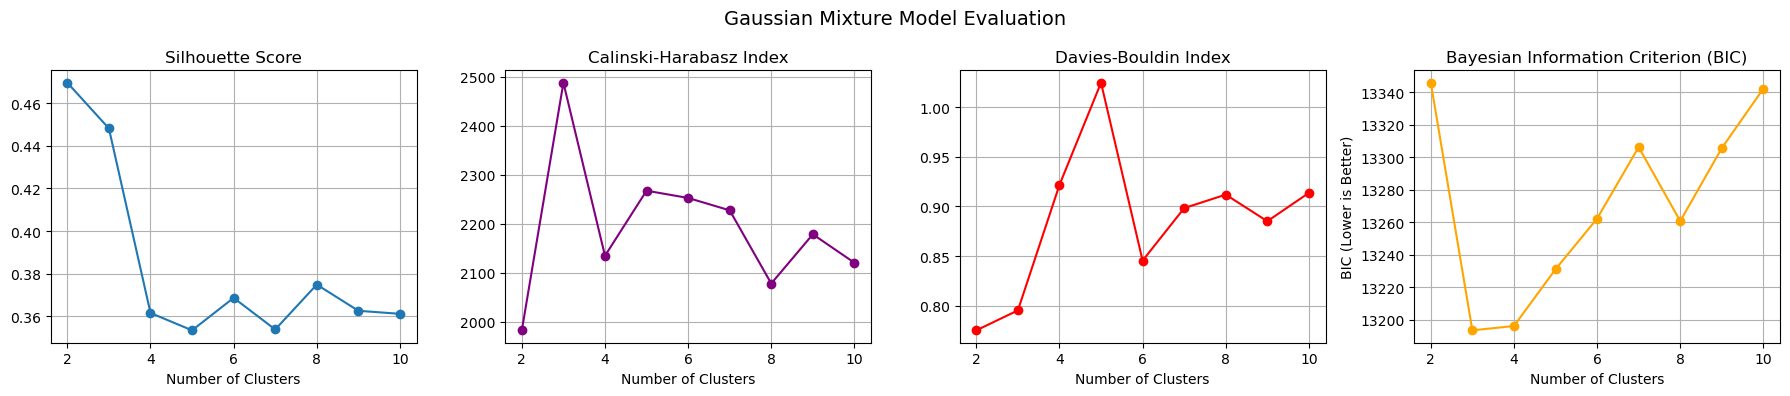

In [69]:
plt.figure(figsize=(18, 4))

# Silhouette
plt.subplot(1, 4, 1)
plt.plot(k_range, silhouettes, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.grid(True)

# Calinski-Harabasz
plt.subplot(1, 4, 2)
plt.plot(k_range, calinskis, marker='o', color='purple')
plt.title("Calinski-Harabasz Index")
plt.xlabel("Number of Clusters")
plt.grid(True)

# Davies-Bouldin
plt.subplot(1, 4, 3)
plt.plot(k_range, davies, marker='o', color='red')
plt.title("Davies-Bouldin Index")
plt.xlabel("Number of Clusters")
plt.grid(True)

# BIC
plt.subplot(1, 4, 4)
plt.plot(k_range, bics, marker='o', color='orange')
plt.title("Bayesian Information Criterion (BIC)")
plt.xlabel("Number of Clusters")
plt.ylabel("BIC (Lower is Better)")
plt.grid(True)

plt.suptitle("Gaussian Mixture Model Evaluation", fontsize=14)
plt.tight_layout()
plt.show()


Based on the evaluation metrics, BIC reaches its lowest value at k = 4, indicating the best balance between model fit and complexity for GMM. While silhouette and Calinski-Harabasz scores slightly favor k = 2–3, BIC—being tailored for probabilistic models—justifies selecting 4 clusters.

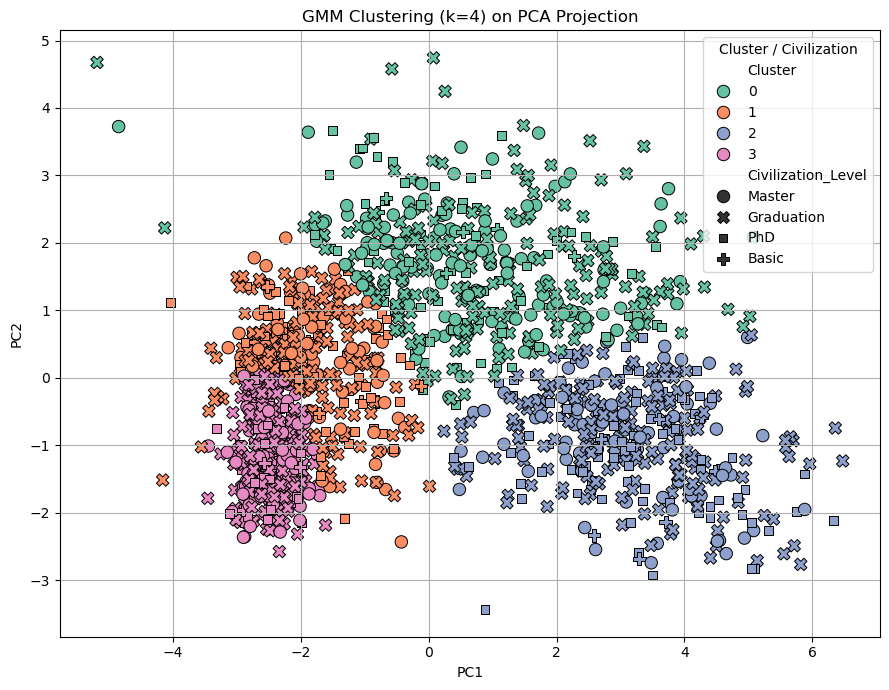

In [70]:
# Final GMM model with k = 4
best_k_gmm = 4
final_gmm = GaussianMixture(n_components=best_k_gmm, random_state=42)
gmm_labels = final_gmm.fit_predict(pca_result)

# Prepare DataFrame for plotting
gmm_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
gmm_df['Cluster'] = gmm_labels
gmm_df['Civilization_Level'] = dat['Alien_Civilization_Level'].map({
    0: 'Basic', 1: 'Graduation', 2: 'Master', 3: 'PhD'
})

# Plot PCA with GMM clusters
plt.figure(figsize=(9, 7))
sns.scatterplot(data=gmm_df, x='PC1', y='PC2',
                hue='Cluster', style='Civilization_Level',
                palette='Set2', s=80, edgecolor='k')
plt.title("GMM Clustering (k=4) on PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster / Civilization')
plt.grid(True)
plt.tight_layout()
plt.show()


GMM Cluster Profiling 

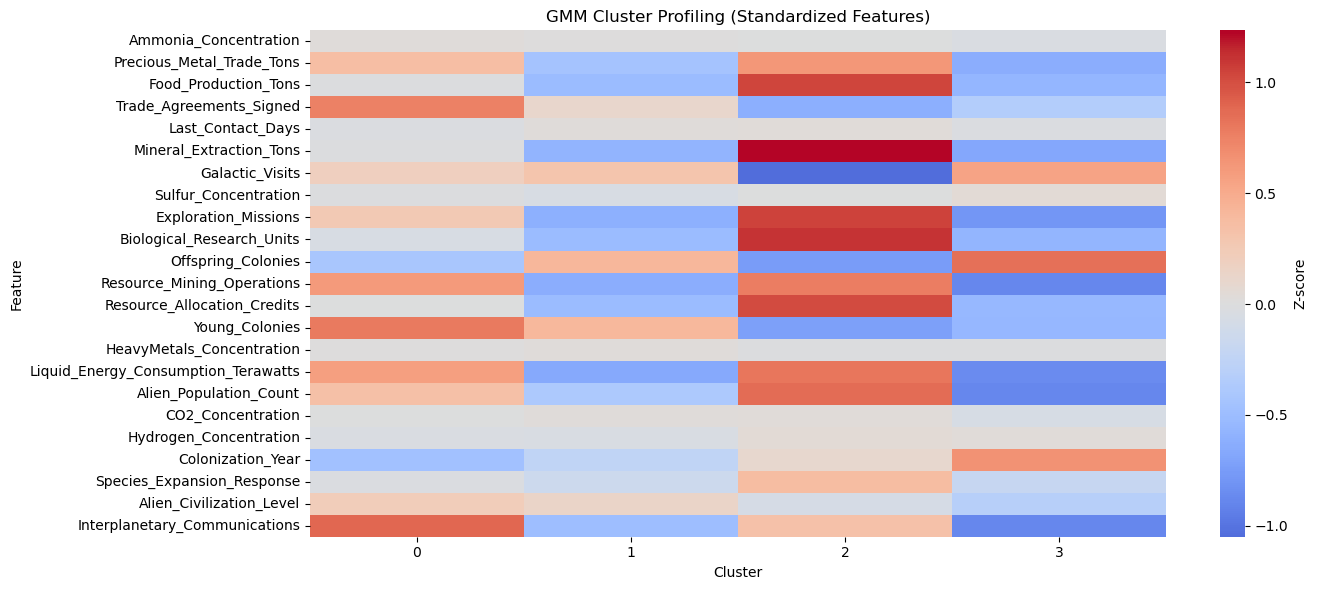

In [71]:
# Add cluster labels to scaled data
dat_clustered_gmm = pd.DataFrame(scaled_data, columns=num_dat.columns)
dat_clustered_gmm['Cluster'] = gmm_labels

# Compute z-score means per cluster
cluster_means_gmm = dat_clustered_gmm.groupby('Cluster').mean()

# Heatmap of standardized feature means
plt.figure(figsize=(14, 6))
sns.heatmap(cluster_means_gmm.T, cmap='coolwarm', center=0, cbar_kws={'label': 'Z-score'})
plt.title("GMM Cluster Profiling (Standardized Features)")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


The GMM cluster profiling reveals that Cluster 2 stands out with high values in mineral extraction, exploration missions, and biological research units, indicating a strong focus on planetary development and expansion. Cluster 1 has generally lower levels across most features, suggesting planets with limited resources or exploratory activity. Cluster 0 highlights slightly elevated levels in trade agreements and offspring colonies, reflecting a social or diplomatic orientation. Cluster 3 appears balanced but with moderate increases in energy consumption and colonization year, hinting at resource-focused planets. These differences reveal how GMM distinguishes clusters based on key environmental and developmental factors.

Civilization Level Distribution in GMM Clusters

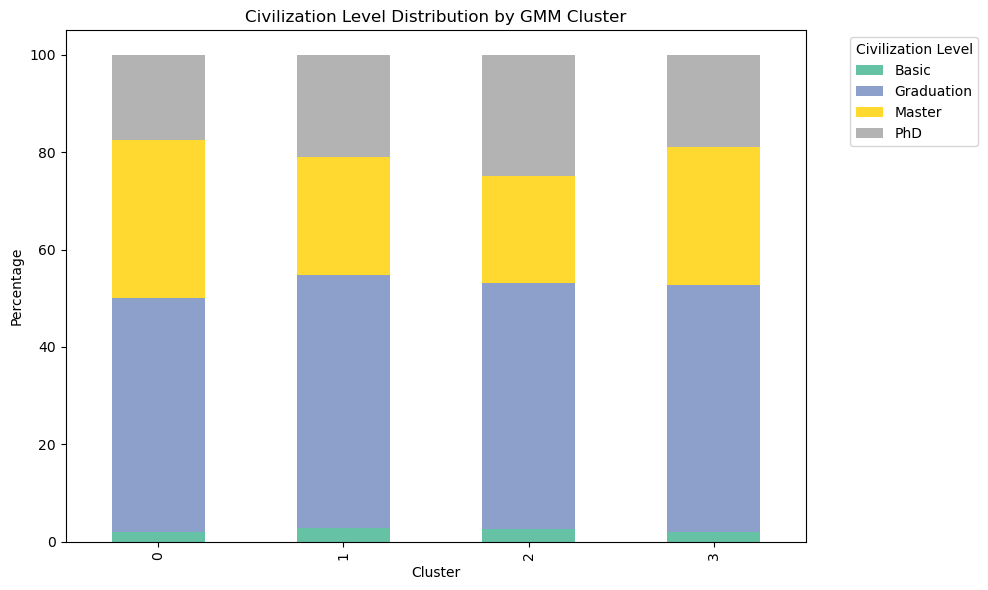

In [72]:
# Civilization distribution in GMM clusters
civ_dist_gmm = pd.crosstab(gmm_df['Cluster'], gmm_df['Civilization_Level'], normalize='index') * 100

# Plot stacked bar
civ_dist_gmm.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10, 6))
plt.title('Civilization Level Distribution by GMM Cluster')
plt.ylabel('Percentage')
plt.xlabel('Cluster')
plt.legend(title='Civilization Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Civilization levels are relatively balanced across GMM clusters. Graduation-level civilizations dominate in all clusters, while Master and PhD levels vary slightly. Basic civilizations remain a very small minority overall. This suggests that civilization level is not a strong differentiator between GMM clusters.

#### Evaluating all clusters and Comparison Table (Silhouette, CH, DBI)

In [73]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# KMeans (k=3)
kmeans_metrics = {
    'Model': 'KMeans',
    'k': 3,
    'Silhouette': silhouette_score(pca_result, kmeans_labels),
    'Calinski-Harabasz': calinski_harabasz_score(pca_result, kmeans_labels),
    'Davies-Bouldin': davies_bouldin_score(pca_result, kmeans_labels)
}

# Agglomerative (k=3)
agglo_metrics = {
    'Model': 'Agglomerative',
    'k': 3,
    'Silhouette': silhouette_score(pca_result, agglo_labels),
    'Calinski-Harabasz': calinski_harabasz_score(pca_result, agglo_labels),
    'Davies-Bouldin': davies_bouldin_score(pca_result, agglo_labels)
}

# GMM (k=4)
gmm_metrics = {
    'Model': 'GMM',
    'k': 4,
    'Silhouette': silhouette_score(pca_result, gmm_labels),
    'Calinski-Harabasz': calinski_harabasz_score(pca_result, gmm_labels),
    'Davies-Bouldin': davies_bouldin_score(pca_result, gmm_labels)
}

# Combine into a DataFrame
import pandas as pd
comparison_df = pd.DataFrame([kmeans_metrics, agglo_metrics, gmm_metrics])
comparison_df.set_index('Model', inplace=True)
comparison_df


,k,Silhouette,Calinski-Harabasz,Davies-Bouldin
Model,,,,
KMeans,3,0.498909,2974.457032,0.721672
Agglomerative,3,0.488764,2633.918448,0.753960
GMM,4,0.361629,2134.406316,0.921613


Metric-by-Metric Evaluation:
1. Silhouette Score (–1 to 1, higher is better):

KMeans and Agglomerative both near 0.5 - good cluster structure.

GMM is lower (0.36), but still acceptable (0.25–0.50 = weak to reasonable structure).

2. Calinski-Harabasz Index (higher is better):

KMeans and Agglomerative both have very high CH scores → strong inter-cluster separation and compactness.

GMM is lower but still decent at 2134.

3. Davies-Bouldin Index (lower is better):

All three models are below 1, which is very good.

KMeans has the best (lowest) DB index - less overlap between clusters.

GMM has the highest DB (0.92), but still acceptable.

To summerize, 
KMeans is best overall (good structure, tight and well-separated clusters),
Agglomerative is very close to KMeans, almost equally good,
GMM	is acceptable, but not as good as others (less compact and more overlap).